In [1]:
# importing required libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, precision_recall_curve, ConfusionMatrixDisplay

In [2]:
# using pandas loading the data to a dataframe

path = r"C:\Users\nvish\Downloads\fraud.csv"

df = pd.read_csv(path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.698044,-0.044198,1.681167,0.974523,-0.245693,0.347156,0.195166,0.083709,0.332076,...,-0.025289,0.383462,-0.177126,0.110510,0.246612,-0.392311,0.337487,-0.064181,149.62,0
1,0.0,0.611828,0.161626,0.110348,0.316899,0.043586,-0.061836,-0.064189,0.072178,-0.233160,...,-0.311883,-0.881473,0.162398,-0.561148,0.320729,0.261163,-0.022699,0.044887,2.69,0
2,1.0,-0.697298,-0.813846,1.175337,0.268550,-0.365429,1.351797,0.644689,0.210063,-1.382624,...,0.342582,1.065046,1.458087,-1.138128,-0.628605,-0.288550,-0.139870,-0.182155,378.66,0
3,1.0,-0.496026,-0.112483,1.188450,-0.610452,-0.007486,0.936388,0.193546,0.320117,-1.266119,...,-0.149605,0.007278,-0.305146,-1.941089,1.242039,-0.460383,0.158494,0.187356,123.50,0
4,2.0,-0.594568,0.533027,1.026537,0.284994,-0.295709,0.072017,0.482983,-0.229449,0.746458,...,-0.013027,1.101757,-0.220391,0.233258,-0.395245,1.041986,0.554455,0.655902,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-6.099055,6.116334,-6.518792,-1.461377,-3.895745,-1.957187,-4.006158,6.195926,1.747550,...,0.294863,0.154391,1.626545,-0.841027,2.756621,0.518686,2.384500,2.511171,0.77,0
283722,172787.0,-0.376170,-0.033449,1.348879,-0.522272,0.630519,0.794647,0.019818,0.250089,0.533824,...,0.295901,1.275803,0.019982,-1.677974,-1.163853,-0.819941,0.173022,-0.163180,24.79,0
283723,172788.0,0.985390,-0.182944,-2.153960,-0.394452,1.910312,2.275839,-0.241782,0.600835,0.394758,...,0.320544,0.798052,-0.060126,1.056978,0.509852,-0.181247,0.011257,-0.080972,67.88,0
283724,172788.0,-0.123428,0.322148,0.465645,0.487772,-0.274480,0.468273,-0.558931,0.576009,0.357909,...,0.366406,1.104200,-0.261820,0.203434,-1.091974,1.134042,0.274978,0.318672,10.00,0


In [3]:
# checking the shape of the data

df.shape

(283726, 31)

In [4]:
# information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [5]:
# Summary of the data

describe=df.describe()
describe=describe.transpose()
describe

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.003038,1.000000,-28.956239,-0.470195,0.010464,0.675590,1.260214
V2,283726.0,-0.002511,1.000000,-44.158375,-0.364559,0.038835,0.485991,13.395087
V3,283726.0,0.001069,1.000000,-32.031662,-0.589708,0.119285,0.680700,6.219043
V4,283726.0,-0.002098,1.000000,-4.018693,-0.601148,-0.015732,0.523020,11.932920
V5,283726.0,0.001327,1.000000,-82.601759,-0.500963,-0.038829,0.444600,25.273389
V6,283726.0,-0.000856,1.000000,-19.641043,-0.577381,-0.206593,0.297908,55.034118
V7,283726.0,0.001467,1.000000,-35.479777,-0.450049,0.033282,0.464682,98.226798
V8,283726.0,-0.000725,1.000000,-62.097827,-0.177115,0.018572,0.276241,16.968859
V9,283726.0,-0.001457,1.000000,-12.263038,-0.588065,-0.048011,0.544026,14.235602


In [6]:
# check for missing values

df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# check for duplicate values

df.duplicated().sum()

0

In [8]:
# Checking Multicollinearinty in the independent columns

from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating dummies for gender
# the independent variables set
X = df.iloc[:, :-1]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

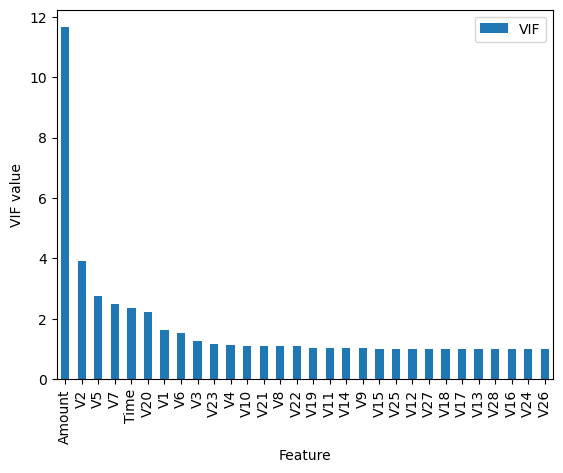

In [9]:
vif_data.set_index('feature').sort_values(by='VIF', ascending=False).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('VIF value')
plt.show()

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

column_trans = ColumnTransformer(
    [('yeo-johnson', PowerTransformer(method='yeo-johnson'), list(df.iloc[:,:-1].columns))],
    remainder='passthrough'
)
transformed = column_trans.fit_transform(df)
df = pd.DataFrame(transformed, columns=df.columns)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.435030,-0.923973,-0.125105,2.176796,0.988852,-0.257807,0.452867,0.195899,0.024696,0.382146,...,-0.007735,0.368924,-0.190463,0.008835,0.209740,-0.320839,0.323541,-0.053391,1.117873,0.0
1,-2.435030,0.627739,0.100981,-0.029033,0.390020,0.031067,0.037531,-0.063371,0.010973,-0.184312,...,-0.302223,-0.884628,0.152517,-0.639427,0.286595,0.357280,-0.042829,0.057652,-1.129040,0.0
2,-2.434772,-0.923380,-0.881325,1.379544,0.343635,-0.376585,1.329473,0.644175,0.177968,-1.455049,...,0.361468,1.070662,1.505845,-1.129616,-0.653575,-0.205725,-0.160343,-0.174374,1.622430,0.0
3,-2.434772,-0.755575,-0.197398,1.399274,-0.579113,-0.020152,0.985452,0.194281,0.315609,-1.320712,...,-0.134764,-0.011057,-0.318238,-1.749553,1.280260,-0.397724,0.140558,0.201535,1.011323,0.0
4,-2.434542,-0.839713,0.537346,1.159361,0.359454,-0.307474,0.178886,0.483057,-0.331943,0.772787,...,0.004730,1.108848,-0.233730,0.140332,-0.430615,1.048867,0.547446,0.667134,0.691723,0.0


In [11]:
X = df.iloc[:, :-1]

# VIF dataframe
new_vif_data = pd.DataFrame()
new_vif_data["feature"] = X.columns

# calculating VIF for each feature
new_vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

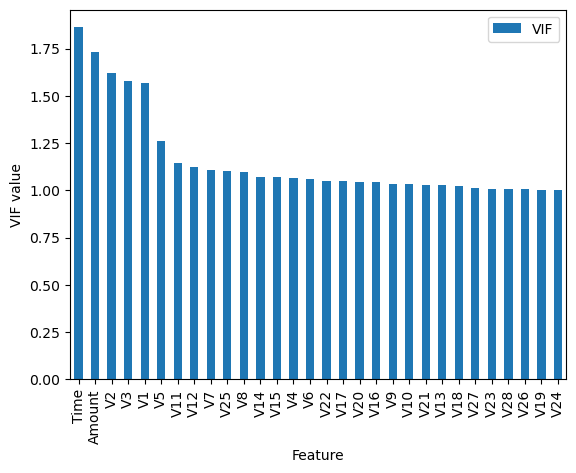

In [12]:
new_vif_data.set_index('feature').sort_values(by='VIF', ascending=False).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('VIF value')
plt.show()

In [13]:
# checking class distribution

df['Class'].value_counts()

Class
0.0    283253
1.0       473
Name: count, dtype: int64

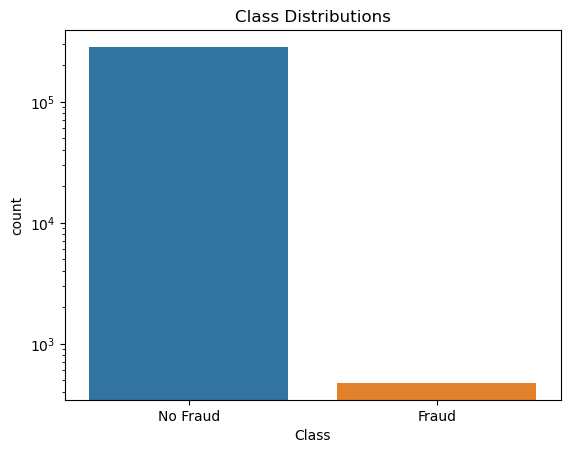

In [14]:
ax=sns.countplot(x='Class',data=df);
ax.set_yscale('log')
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Class Distributions')
plt.show()

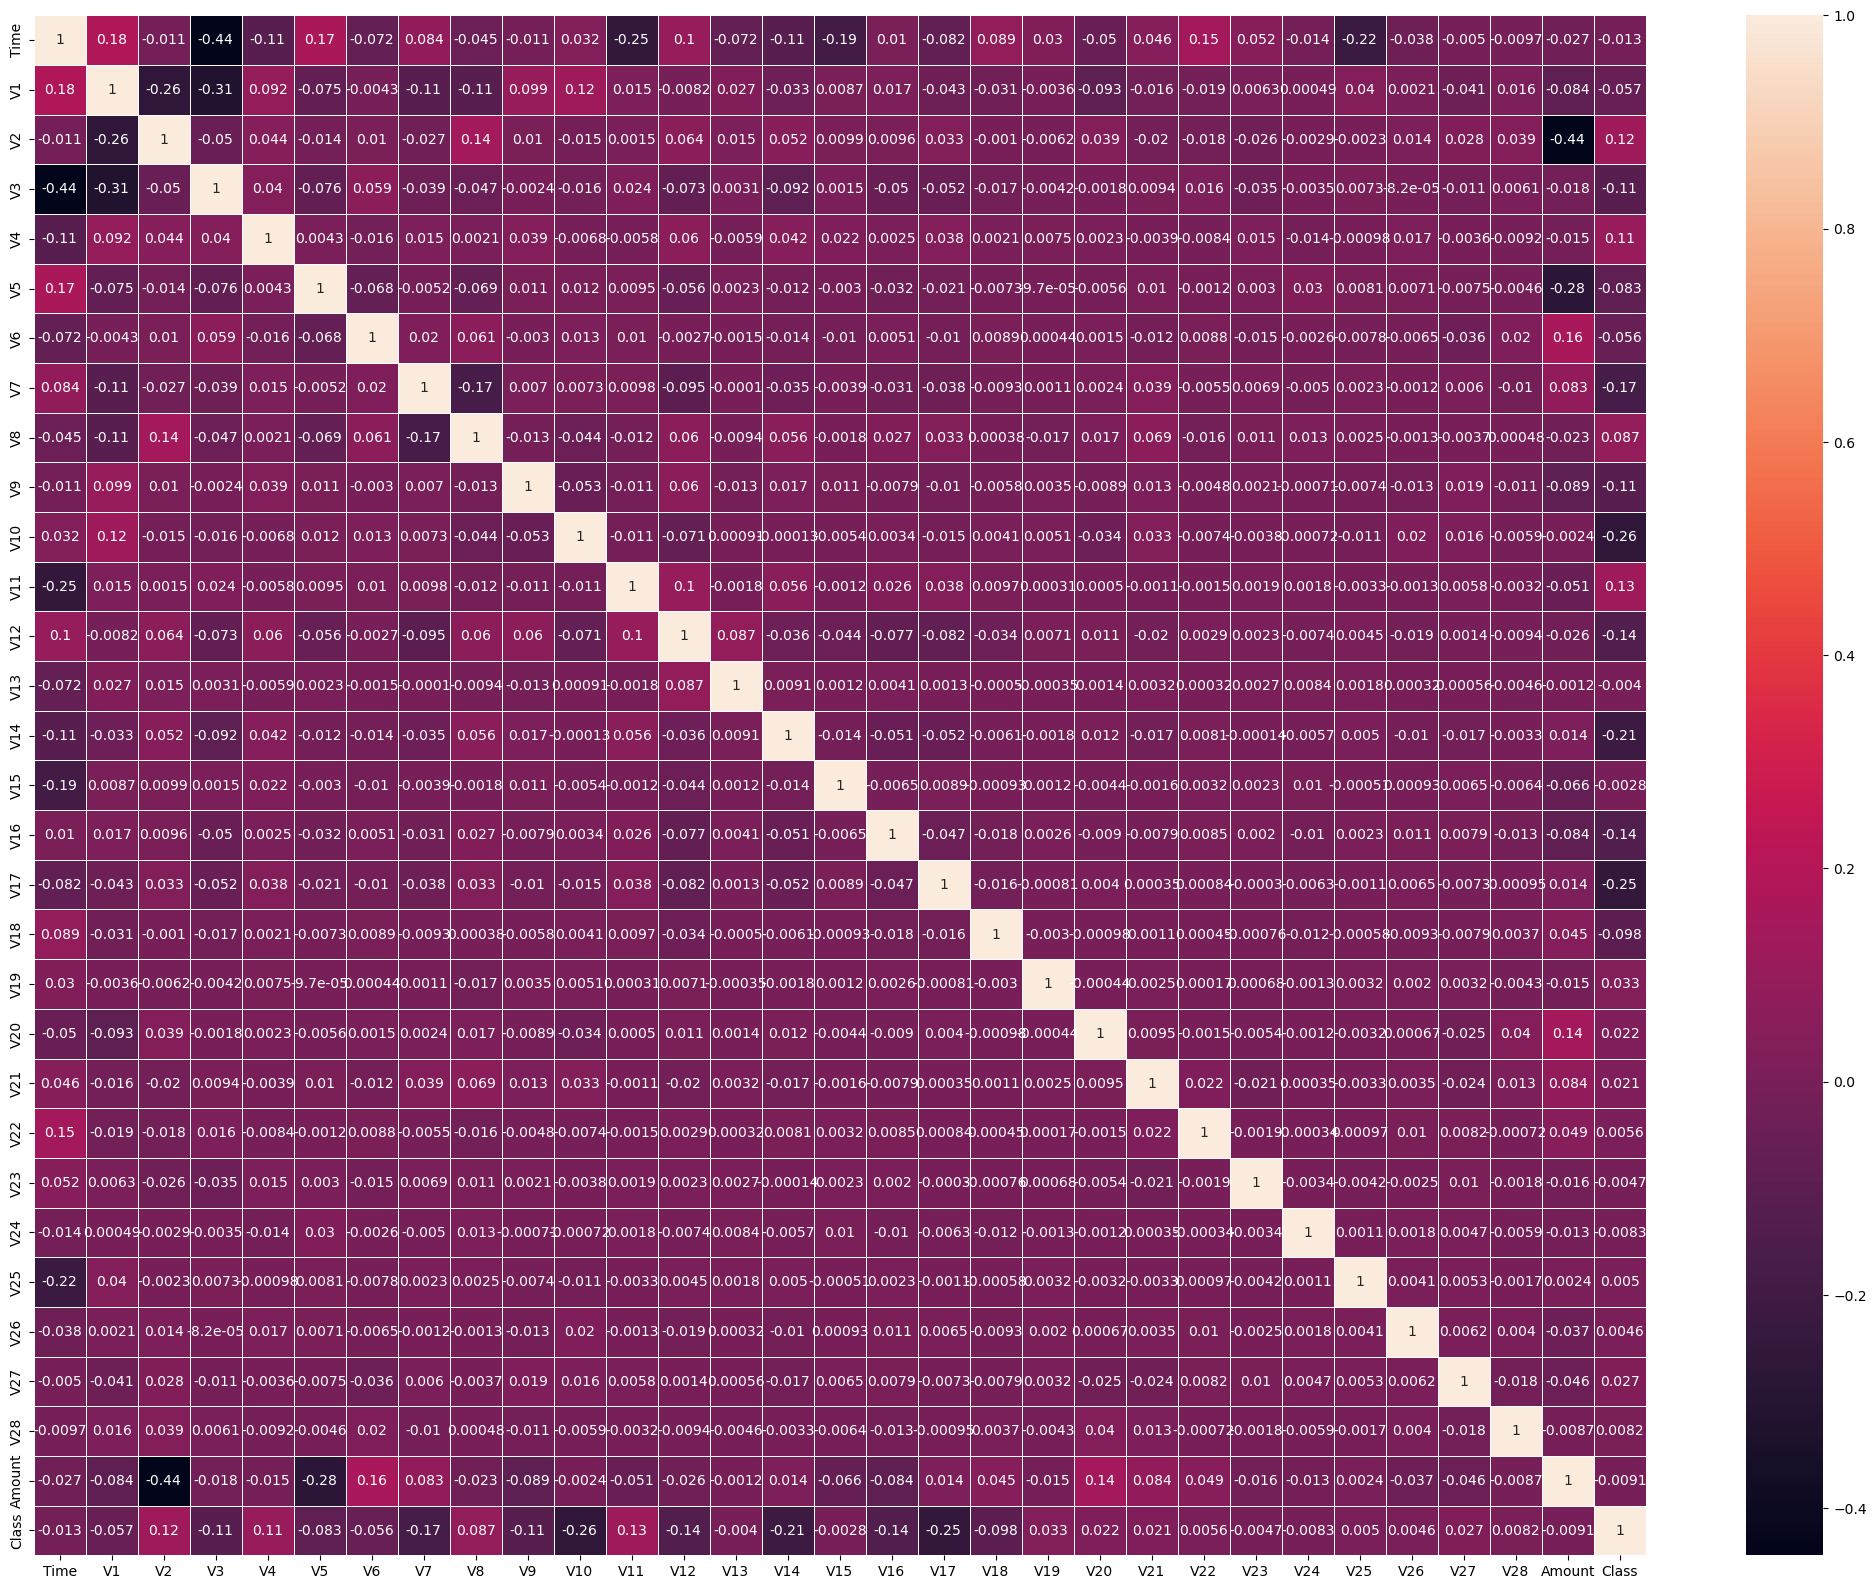

In [52]:
plt.figure(figsize=(26,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5)
plt.show()

In [15]:
x = df.drop('Class',axis=1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-2.435030,-0.923973,-0.125105,2.176796,0.988852,-0.257807,0.452867,0.195899,0.024696,0.382146,...,0.324074,-0.007735,0.368924,-0.190463,0.008835,0.209740,-0.320839,0.323541,-0.053391,1.117873
1,-2.435030,0.627739,0.100981,-0.029033,0.390020,0.031067,0.037531,-0.063371,0.010973,-0.184312,...,-0.093062,-0.302223,-0.884628,0.152517,-0.639427,0.286595,0.357280,-0.042829,0.057652,-1.129040
2,-2.434772,-0.923380,-0.881325,1.379544,0.343635,-0.376585,1.329473,0.644175,0.177968,-1.455049,...,0.681580,0.361468,1.070662,1.505845,-1.129616,-0.653575,-0.205725,-0.160343,-0.174374,1.622430
3,-2.434772,-0.755575,-0.197398,1.399274,-0.579113,-0.020152,0.985452,0.194281,0.315609,-1.320712,...,-0.273253,-0.134764,-0.011057,-0.318238,-1.749553,1.280260,-0.397724,0.140558,0.201535,1.011323
4,-2.434542,-0.839713,0.537346,1.159361,0.359454,-0.307474,0.178886,0.483057,-0.331943,0.772787,...,0.529277,0.004730,1.108848,-0.233730,0.140332,-0.430615,1.048867,0.547446,0.667134,0.691723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,1.535539,-3.248924,9.501002,-4.153635,-1.591472,-3.771020,-2.450063,-4.041155,10.826599,1.662492,...,1.931181,0.314083,0.136782,1.685492,-0.883009,3.022637,0.596267,2.499202,2.439570,-1.619872
283722,1.535557,-0.647447,-0.113606,1.644799,-0.480056,0.625697,0.862766,0.020668,0.227595,0.574426,...,0.074189,0.315115,1.290354,0.007877,-1.552810,-1.151001,-0.820331,0.155347,-0.154857,0.095054
283723,1.535574,1.313119,-0.270700,-1.873623,-0.338751,1.948622,2.031550,-0.241215,0.682627,0.442351,...,-0.001517,0.339602,0.794052,-0.072986,1.115842,0.485077,-0.089460,-0.008616,-0.070556,0.674329
283724,1.535574,-0.393963,0.285408,0.394855,0.551017,-0.286403,0.567641,-0.559341,0.649298,0.407012,...,0.162465,0.385075,1.111390,-0.275080,0.108002,-1.085176,1.124815,0.259449,0.333112,-0.428356


In [16]:
y = df['Class']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
283721    0.0
283722    0.0
283723    0.0
283724    0.0
283725    0.0
Name: Class, Length: 283726, dtype: float64

In [17]:
x.shape

(283726, 30)

In [18]:
y.shape

(283726,)

# Model 1 : Basic Logistic Regression

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [20]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred = model1.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

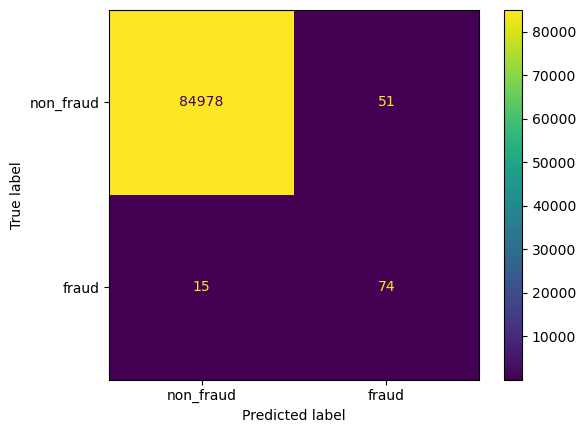

In [22]:
print(ConfusionMatrixDisplay.from_predictions(y_pred,y_test,display_labels=['non_fraud','fraud']))

In [23]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, beta=2)

In [24]:
results1 = [["Accuracy", accuracy],
           ["Precision", precision],
           ["Recall", recall],
           ["F2 Score", f2_score]]

# Print the results in a table format
print(tabulate(results1, headers=["Metric", "Score"], tablefmt="grid"))

+-----------+----------+
| Metric    |    Score |
+===========+==========+
| Accuracy  | 0.999225 |
+-----------+----------+
| Precision | 0.831461 |
+-----------+----------+
| Recall    | 0.592    |
+-----------+----------+
| F2 Score  | 0.628183 |
+-----------+----------+


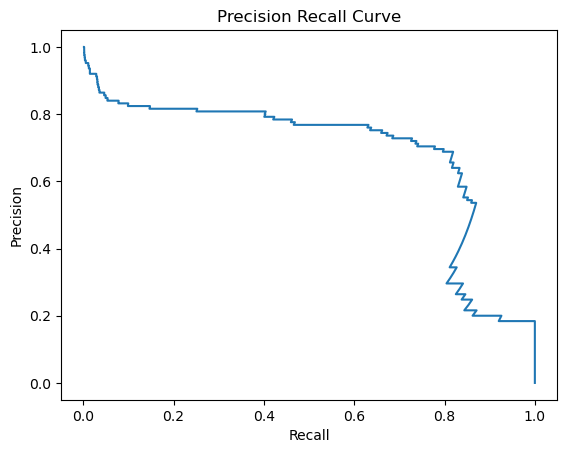

In [25]:
precision, recall, _ = precision_recall_curve(y_test, model1.predict_proba(X_test)[:, 1])

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# Model 2 : Logistic Regression with SMOTE

In [26]:
# Over sampling technique is used to balance the dataset

from imblearn.over_sampling import SMOTE

os=SMOTE(random_state=42)
x_os,y_os=os.fit_resample(x,y)

In [27]:
x_os.shape

(566506, 30)

In [28]:
y_os.shape

(566506,)

In [29]:
X_os_train,X_os_test,y_os_train,y_os_test = train_test_split(x_os,y_os,test_size=0.3,random_state=1)

In [30]:
model2 = LogisticRegression()
model2.fit(X_os_train,y_os_train)

LogisticRegression()

In [31]:
y_os_pred = model2.predict(X_os_test)
y_os_pred

array([0., 1., 1., ..., 1., 0., 1.])

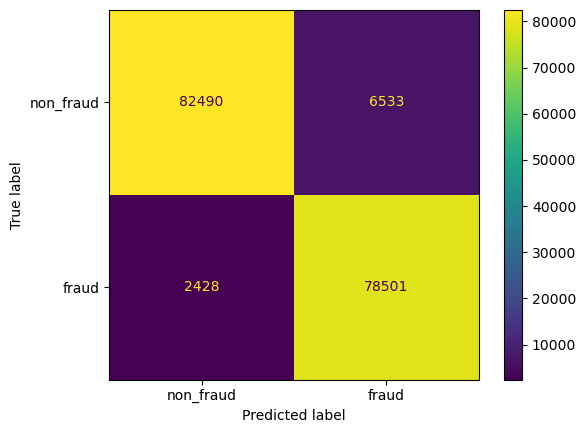

In [32]:
print(ConfusionMatrixDisplay.from_predictions(y_os_pred,y_os_test,display_labels=['non_fraud','fraud']))

In [33]:
accuracy = accuracy_score(y_os_test, y_os_pred)
precision = precision_score(y_os_test, y_os_pred)
recall = recall_score(y_os_test, y_os_pred)
f2_score = fbeta_score(y_os_test, y_os_pred, beta=2)

In [34]:
results2 = [["Accuracy", accuracy],
           ["Precision", precision],
           ["Recall", recall],
           ["F2 Score", f2_score]]

# Print the results in a table format
print(tabulate(results2, headers=["Metric", "Score"], tablefmt="grid"))

+-----------+----------+
| Metric    |    Score |
+===========+==========+
| Accuracy  | 0.947273 |
+-----------+----------+
| Precision | 0.969998 |
+-----------+----------+
| Recall    | 0.923172 |
+-----------+----------+
| F2 Score  | 0.932172 |
+-----------+----------+


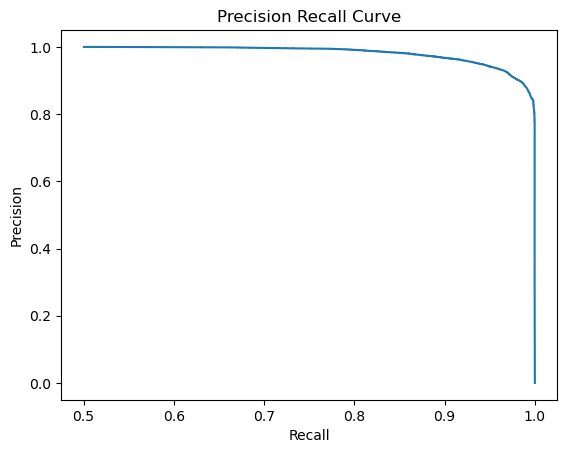

In [35]:
precision, recall, _ = precision_recall_curve(y_os_test, model2.predict_proba(X_os_test)[:, 1])

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# Model 3: Random Forest Classifier (Ensemble method)

In [36]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [37]:
y_pred1 = rf_model.predict(X_test)

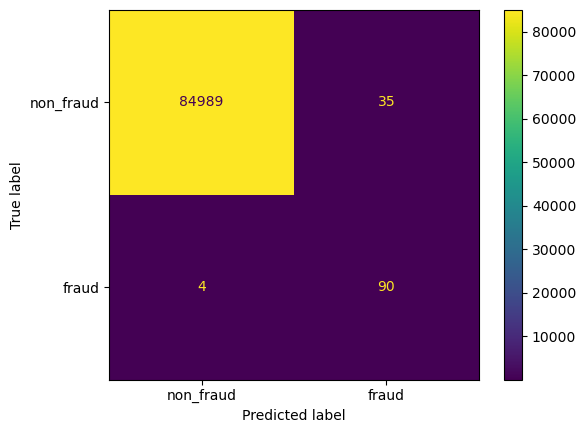

In [38]:
print(ConfusionMatrixDisplay.from_predictions(y_pred1,y_test,display_labels=['non_fraud','fraud']))

In [39]:
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f2_score = fbeta_score(y_test, y_pred1, beta=2)

In [40]:
results3 = [["Accuracy", accuracy],
           ["Precision", precision],
           ["Recall", recall],
           ["F2 Score", f2_score]]

# Print the results in a table format
print(tabulate(results3, headers=["Metric", "Score"], tablefmt="grid"))

+-----------+----------+
| Metric    |    Score |
+===========+==========+
| Accuracy  | 0.999542 |
+-----------+----------+
| Precision | 0.957447 |
+-----------+----------+
| Recall    | 0.72     |
+-----------+----------+
| F2 Score  | 0.757576 |
+-----------+----------+


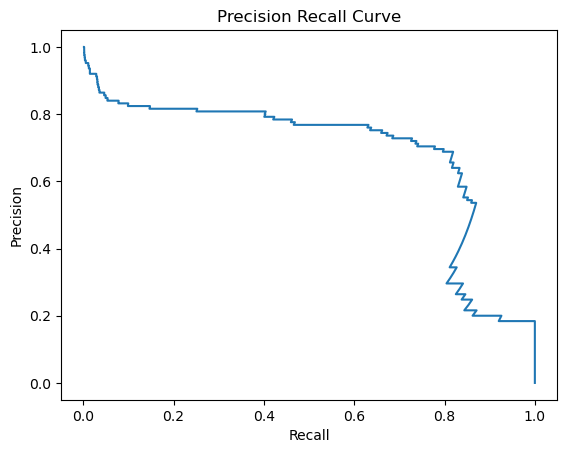

In [41]:
precision, recall, _ = precision_recall_curve(y_test, model1.predict_proba(X_test)[:, 1])

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# Model 4: Random Forest Classifier with SMOTE

In [42]:
rf_model1 = RandomForestClassifier(random_state=1)
rf_model1.fit(X_os_train,y_os_train)

RandomForestClassifier(random_state=1)

In [43]:
y_os_pred1 = rf_model1.predict(X_os_test)
y_os_pred1

array([0., 1., 1., ..., 1., 0., 1.])

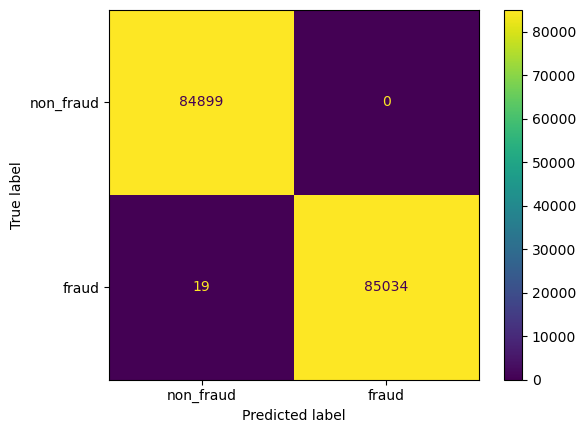

In [44]:
print(ConfusionMatrixDisplay.from_predictions(y_os_pred1,y_os_test,display_labels=['non_fraud','fraud']))

In [45]:
accuracy = accuracy_score(y_os_pred1,y_os_test)
precision = precision_score(y_os_pred1,y_os_test)
recall = recall_score(y_os_pred1,y_os_test)
f2_score = fbeta_score(y_os_pred1,y_os_test, beta=2)

In [46]:
results4 = [["Accuracy", accuracy],
           ["Precision", precision],
           ["Recall", recall],
           ["F2 Score", f2_score]]

# Print the results in a table format
print(tabulate(results4, headers=["Metric", "Score"], tablefmt="grid"))

+-----------+----------+
| Metric    |    Score |
+===========+==========+
| Accuracy  | 0.999888 |
+-----------+----------+
| Precision | 1        |
+-----------+----------+
| Recall    | 0.999777 |
+-----------+----------+
| F2 Score  | 0.999821 |
+-----------+----------+


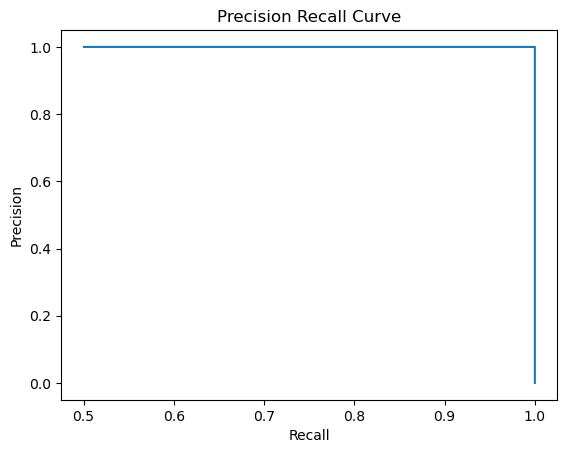

In [47]:
precision, recall, _ = precision_recall_curve(y_os_test, rf_model1.predict_proba(X_os_test)[:, 1])

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()